In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


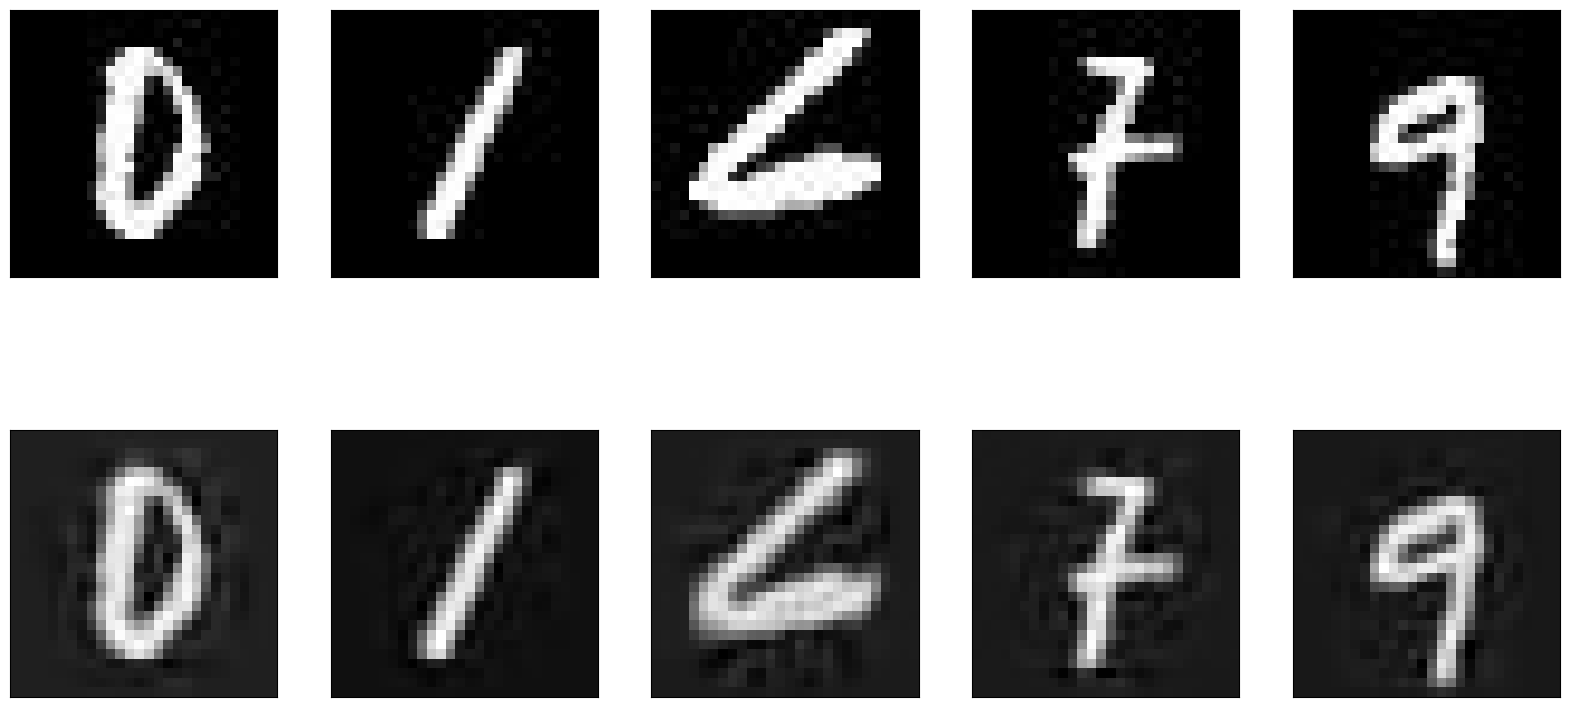

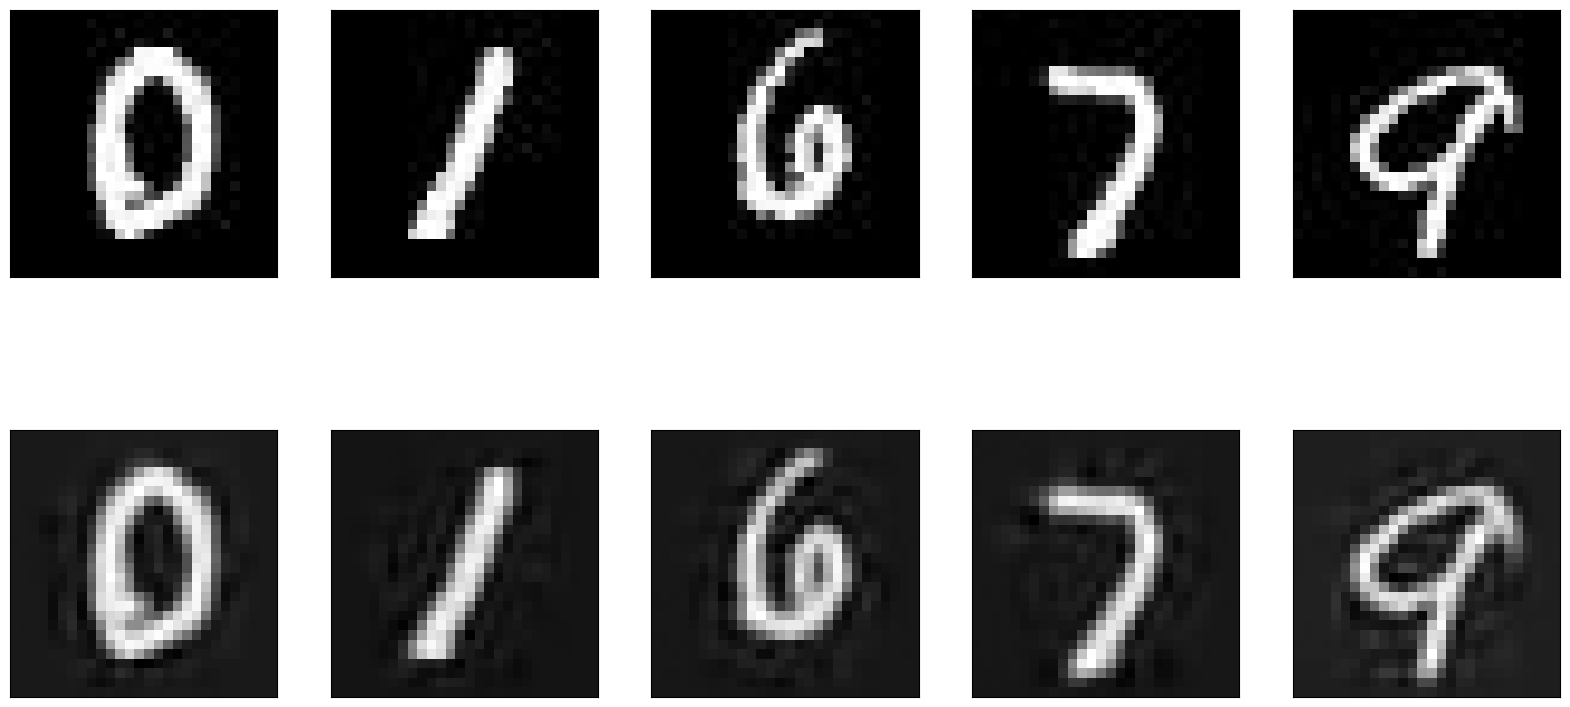

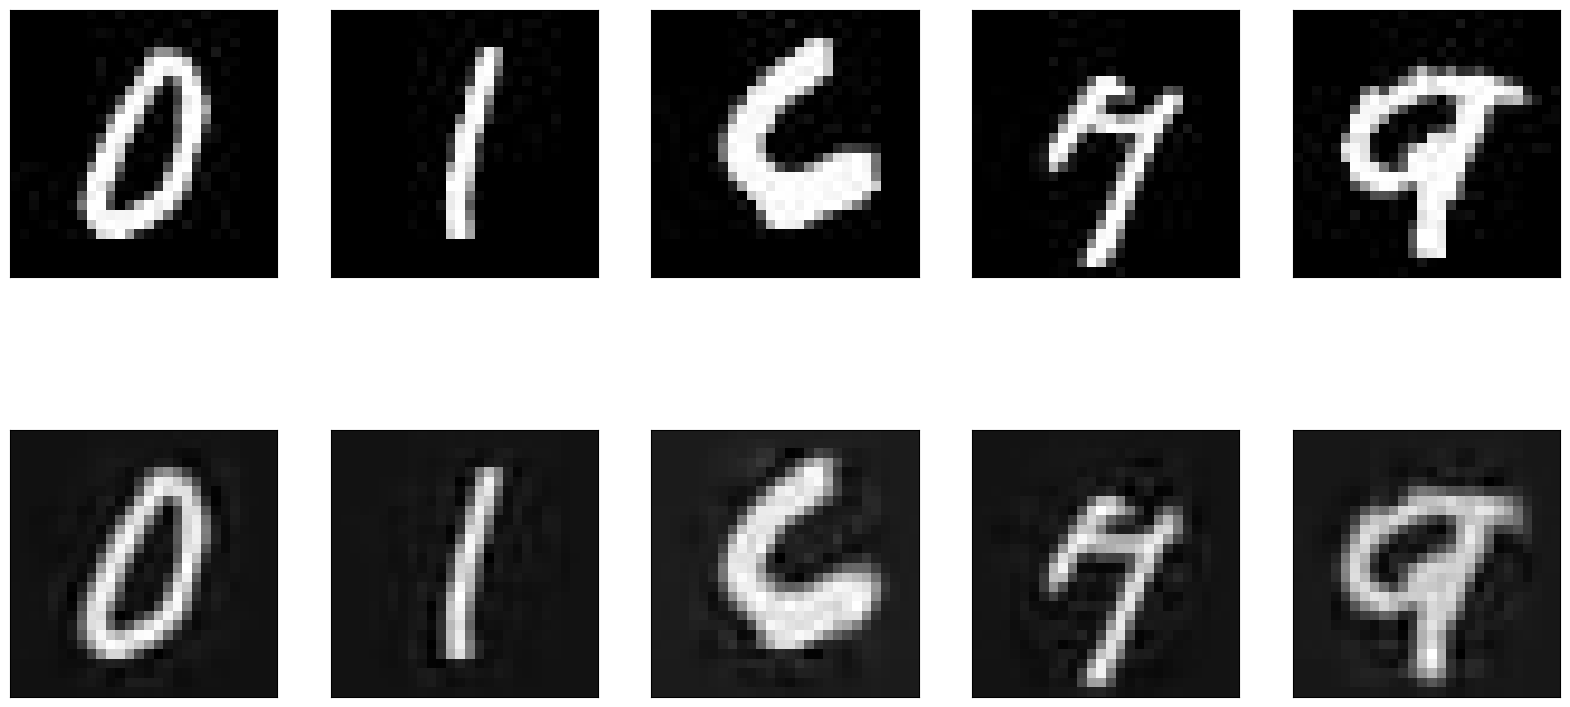

[[[ 3.98549497e-04 -3.17774779e-04  2.55101937e-04 ...  1.92265503e-04
    3.57785407e-04  2.07782996e-04]
  [-4.08540705e-04  8.56653940e-04 -1.51229393e-04 ...  1.68026848e-04
    7.89981497e-05  1.76210051e-04]
  [ 1.54722819e-04  4.94831805e-04  6.37903870e-05 ...  5.07365322e-04
   -9.06456616e-05 -4.08334381e-05]
  ...
  [-1.98481373e-04 -6.93723175e-04 -5.25860784e-04 ...  7.00337207e-05
   -2.60651980e-05  1.71002999e-06]
  [-1.99084458e-04 -8.07884522e-05 -1.10069758e-04 ...  4.64783475e-05
    1.25214119e-04  3.09727909e-05]
  [-3.10362531e-04 -2.25943808e-04 -4.83751220e-05 ...  1.10039345e-04
    1.42926255e-06  6.28704288e-06]]

 [[ 1.65385788e-04 -8.01529758e-05  7.97862370e-05 ...  3.10148757e-04
    3.82848741e-04  3.57733477e-04]
  [ 9.98455516e-06  1.53468122e-04 -1.44526513e-04 ...  3.13838152e-04
    3.69860041e-04  3.88919185e-04]
  [-4.43284793e-04  1.10884874e-04  4.85019716e-04 ...  9.28003473e-04
    3.85531415e-04  4.32460680e-04]
  ...
  [ 1.73713461e-04  1.2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 

initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)


#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/content/drive/MyDrive/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)

Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255

#bottleneck dimension
pcaDim=128

xTrain=np.reshape(Input_train_Dataset,(Input_train_Dataset.shape[0],784))
xVal=np.reshape(Input_val_Dataset,(Input_val_Dataset.shape[0],784))
xTest=np.reshape(Input_test_Dataset,(Input_test_Dataset.shape[0],784))

pca=PCA(pcaDim)#based on arch
pcaFit=pca.fit(xTrain)

pcaTrain=pca.transform(xTrain)
trainReconstruct=pca.inverse_transform(pcaTrain).reshape(Input_train_Dataset.shape[0],28,28)

n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


pcaVal=pca.transform(xVal)
valReconstruct=pca.inverse_transform(pcaVal).reshape(Input_val_Dataset.shape[0],28,28)

n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


pcaTest=pca.transform(xTest)
testReconstruct=pca.inverse_transform(pcaTest).reshape(Input_test_Dataset.shape[0],28,28)

n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

print(trainReconstruct)

model = keras.Sequential([
        #layers.Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(512, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(128, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])

#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=10,verbose=1)

model_fit = model.fit(x = pcaTrain, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(pcaVal,  Output_val), validation_batch_size=1)
model.save('/content/drive/MyDrive/DLA4/PCA/pca2_32.h5')
f=open('/content/drive/MyDrive/DLA4/PCA/Histpca2_128.pckl','wb')
p.dump(model_fit.history,f)
f.close()


print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=pcaTrain,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=pcaVal, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=pcaTest, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(pcaTest, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)
